UNIVERSIDADE DO ESTADO DO AMAZONAS - MICROECONOMIA II

Hal R. Varian - Microeconomia

Capítulo 25.3 - Demanda com Elasticidade Constante e Monopólio


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide


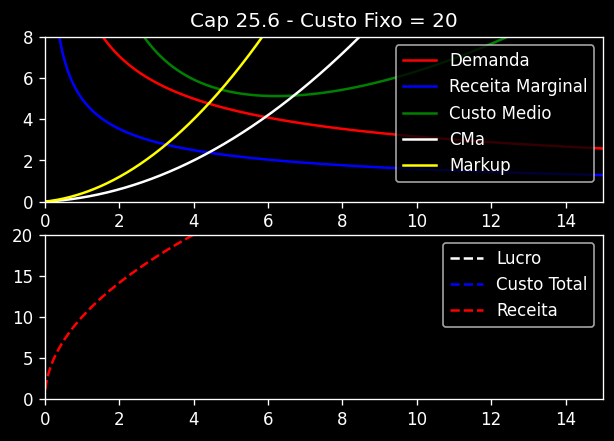

In [10]:
### Universidade do Estado do Amazonas - UEA (Microeconomia II)
## Modelo de Otimização da Receita do Monopólio com uma Demanda com Elasticidade Constante

# Modulos usados
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

plt.style.use('dark_background')

# Sistema de Equações:
# Curva de Demanda Inversa CES -> p(y) = a * y^1/epsilon
# Função Receita -> r(y) = p(y)y = a * y^(1/epsilon) * y
# Função Receita Marginal -> RM(y) = p(y) * [1 - 1/|epsilon|]
# Função Custo Total -> c(y) = CF + CV*y^2 + (CV*y^3)/3
# Função Custo Marginal -> CMa(y) = y*CV + y*CV^2

# Constantes usadas nas equações:
a = 10
epsilon = -2
CF = 2 # custo fixo
CV = 0.1 # custo variavel

# Modelo
y = np.linspace(0,15,1000)

dem_ces = a * y**(1/epsilon)
receita = a * y**(1/epsilon) * y
rec_marg = dem_ces * (1 - (1 / abs(epsilon)))
custo_total = CF + CV*y**2 + (CV*y**3)/3
custo_medio = custo_total / y
custo_marginal = CV*y + CV*y**2
lucro = receita - custo_total

phi = 1 / (1 - 1/abs(epsilon))
oferta = phi * (custo_marginal) # markup de lerner

# Dataframe
dataframe = pd.DataFrame()
dataframe['quant'] = y
dataframe['dem_ces'] = dem_ces
dataframe['receita'] = receita
dataframe['rec_marg'] = rec_marg
dataframe['custo_total'] = custo_total
dataframe['custo_medio'] = custo_medio
dataframe['custo_marginal'] = custo_marginal
dataframe['lucro'] = lucro

dataframe['oferta'] = oferta
dataframe['oferta'] = dataframe['oferta'].map(lambda s: None if s <= 0 else s)

# Gerando o gráfico
fig = plt.figure(dpi=120)
ax = plt.axes()
ax.grid(color='gray',linewidth=.2)

plt.subplot(2,1,1) # rows, columns, panel number

plt.title('Cap 25.3 - Demanda com Elasticidade Constante e Monopólio')

plt.plot(dataframe['quant'], dataframe['dem_ces'],'-',color='red', label='Demanda')
plt.plot(dataframe['quant'], dataframe['rec_marg'],'-',color='blue', label='Receita Marginal')
plt.plot(dataframe['quant'], dataframe['custo_medio'],'-',color='green', label='Custo Medio')
plt.plot(dataframe['quant'], dataframe['custo_marginal'],'-',color='white', label='CMa')
plt.plot(dataframe['quant'], dataframe['oferta'],'-',color='yellow', label='Markup') # oferta do monopolista
plt.legend(loc='upper right')
plt.ylim(0,8)
plt.xlim(0,max(y))

plt.subplot(2,1,2) # rows, columns, panel number
plt.plot(dataframe['quant'], dataframe['lucro'],'--',color='white', label='Lucro')
plt.plot(dataframe['quant'], dataframe['custo_total'],'--',color='blue', label='Custo Total')
plt.plot(dataframe['quant'], dataframe['receita'],'--',color='red', label='Receita')
plt.legend(loc='upper right')
plt.ylim(0,20)
plt.xlim(0,max(y))

plt.show()
